In [1]:
import numpy as np
import math
import random
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
SEED = 42 

In [28]:
def get_expected_probability_of_an_edge(N,k):
    """ given N size of the network and average degree 
        computes the probability of an edge between any 
        two nodes for Erdos Renyl Graphs """
    return k / (N - 1)

def remove_most_connected_nodes(G, f):
    """ G is the graph , f is the ratio of the nodes to be removed """
    size = int(len(G.nodes()) * f) 
    for i in range(size):
        degree_list = list(G.degree)
        degree_to_be_removed = sorted(degree_list, key = lambda x : x[1] , reverse = True)[0][0]
        G.remove_node(degree_to_be_removed)
    return G
        

def generate_nodes_to_be_removed(G, f):
    """ G is the graph , f is the percentage of nodes to be randomly removed """
    size = int(len(G.nodes())  * f)
    nodes = [i for i in range(len(G.nodes()))]
    removed_nodes = random.sample(nodes, size)
    return removed_nodes

def delete_nodes(G, removed_nodes):
    """ remove nodes given in removed_nodes from Graph G """
    G.remove_nodes_from(removed_nodes)

def compute_largest_cluster(G):
    """ computes the size of largest cluster and returns it as a fraction of the size  """
    size = len(G.nodes())
    cluster_sizes = [len(c) for c in sorted(nx.connected_components(G), key = len, reverse= True)]
    max_size = max(cluster_sizes)
    return max_size / size
def compute_expected_size_of_isolated_cluster(G):
    cluster_sizes = [len(c) for c in sorted(nx.connected_components(G), key = len, reverse= True)]
    isolated_cluster_size = cluster_sizes[1:]
    return sum(isolated_cluster_size) / len(isolated_cluster_size)

def metrics_for_fragmentation_ER(N, k, f):
    """ given N :size and k : average degree  and f : fraction of nodes removed return S and <s> for modelling error """
    p = get_expected_probability_of_an_edge(N,k)
    G = nx.erdos_renyi_graph(N,p, seed = SEED)
    removed_nodes = generate_nodes_to_be_removed(G,f)
    delete_nodes(G, removed_nodes)
    #print(len(list(G.nodes)))
       
    S = compute_largest_cluster(G)
    s = compute_expected_size_of_isolated_cluster(G)
    return s, S    
def generate_attack_data_ER(N, m , f):
    G = nx.erdos_renyi_graph(N,m, seed = SEED)
    max_nodes_to_be_removed = int(N * f)
    data = []
    for i in range(1,max_nodes_to_be_removed + 1):
        print(" N : {0} and cur_f : {1} with max f : {2}".format(N, i / N , f))
        degree_list = list(G.degree)
        degree_to_be_removed = sorted(degree_list, key = lambda x : x[1] , reverse = True)[0][0]
        G.remove_node(degree_to_be_removed)
        S = compute_largest_cluster(G)
        s = compute_expected_size_of_isolated_cluster(G)
        cur_f = i / N
        data.append([cur_f, S, s])
    return data 


def generate_attack_data_ER_2(N, k , f):
    max_nodes_to_be_removed = int( N * f)
    p = get_expected_probability_of_an_edge(N,k)

    G = nx.erdos_renyi_graph(N, p, seed = SEED)
    max_nodes_to_be_removed = int(N * f)
    data = []
    for i in range(1,max_nodes_to_be_removed + 1):
        print(" N : {0} and cur_f : {1} with max f : {2}".format(N, i / N , f))
        degree_list = list(G.degree)
        degree_to_be_removed = sorted(degree_list, key = lambda x : x[1] , reverse = True)[0][0]
        G.remove_node(degree_to_be_removed)
        S = compute_largest_cluster(G)
        s = compute_expected_size_of_isolated_cluster(G)
        cur_f = i / N
        data.append([cur_f, S, s])
    return data 

def generate_failure_data_for_scale_free(N, m, f):
    max_nodes_to_be_removed = int( N * f)
    G = nx.barabasi_albert_graph(N, m , seed = SEED)

    nodes = list(G.nodes)
    nodes_to_be_removed = random.sample(nodes, max_nodes_to_be_removed)
    data = []
    for i , node in enumerate(nodes_to_be_removed):
        print(" N : {0} and cur_f : {1} with max f : {2}".format(N, (i + 1) / N , f))

        G.remove_node(node)
        cluster_sizes = [len(c) for c in sorted(nx.connected_components(G), key = len, reverse= True)]
        if len(cluster_sizes) > 2 :

            S = compute_largest_cluster(G)
            s = compute_expected_size_of_isolated_cluster(G)
            cur_f = i / N
            data.append([cur_f, S, s])
    return data 

def generate_attack_data_scale_free(N, m , f):
    max_nodes_to_be_removed = int( N * f)

    G = nx.barabasi_albert_graph(N, m, seed = SEED)
    max_nodes_to_be_removed = int(N * f)
    data = []
    for i in range(1,max_nodes_to_be_removed + 1):
        print(" N : {0} and cur_f : {1} with max f : {2}".format(N, i / N , f))
        degree_list = list(G.degree)
        degree_to_be_removed = sorted(degree_list, key = lambda x : x[1] , reverse = True)[0][0]
        G.remove_node(degree_to_be_removed)
        cluster_sizes = [len(c) for c in sorted(nx.connected_components(G), key = len, reverse= True)]
        if len(cluster_sizes) > 2 :
            S = compute_largest_cluster(G)
            s = compute_expected_size_of_isolated_cluster(G)
            cur_f = i / N
            data.append([cur_f, S, s])
    return data 

        
    


        
        
    
    
    

## ERROR TOLERANCE FOR ERDOS RENYL


In [4]:
fs = [i * 0.02 for i in range(35)]
Ns = [1000,5000,20000]
k = 4
data = []
for i, N in enumerate(Ns):
    s_data = []
    S_data = []
    for j, f in enumerate(fs):
        print("Computing for N : {0} and f : {1}".format(N,f))
        s, S = metrics_for_fragmentation_ER(N, k, f)
        s_data.append(s)
        S_data.append(S)
    data.append([s_data,S_data])
    

    



         


Computing for N : 1000 and f : 0.0
Computing for N : 1000 and f : 0.02
Computing for N : 1000 and f : 0.04
Computing for N : 1000 and f : 0.06
Computing for N : 1000 and f : 0.08
Computing for N : 1000 and f : 0.1
Computing for N : 1000 and f : 0.12
Computing for N : 1000 and f : 0.14
Computing for N : 1000 and f : 0.16
Computing for N : 1000 and f : 0.18
Computing for N : 1000 and f : 0.2
Computing for N : 1000 and f : 0.22
Computing for N : 1000 and f : 0.24
Computing for N : 1000 and f : 0.26
Computing for N : 1000 and f : 0.28
Computing for N : 1000 and f : 0.3
Computing for N : 1000 and f : 0.32
Computing for N : 1000 and f : 0.34
Computing for N : 1000 and f : 0.36
Computing for N : 1000 and f : 0.38
Computing for N : 1000 and f : 0.4
Computing for N : 1000 and f : 0.42
Computing for N : 1000 and f : 0.44
Computing for N : 1000 and f : 0.46
Computing for N : 1000 and f : 0.48
Computing for N : 1000 and f : 0.5
Computing for N : 1000 and f : 0.52
Computing for N : 1000 and f : 0.5

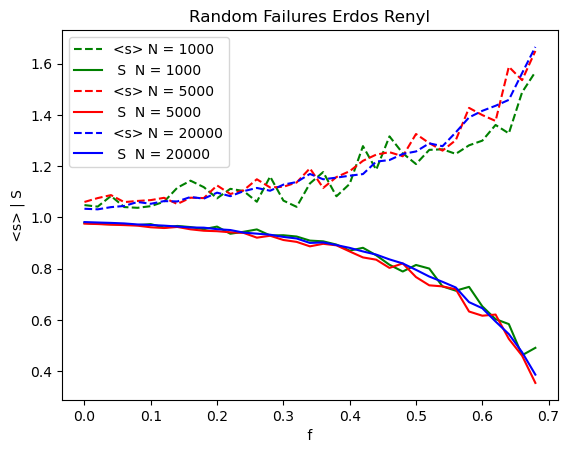

In [5]:
colors = ["green", "red" , "blue"]
for i,N in enumerate(Ns):
    plt.plot(fs, data[i][0], color = colors[i] , linestyle = "dashed" , label = "<s> N = " + str(N))
    plt.plot(fs, data[i][1], color = colors[i], label = " S  N = " + str(N))
plt.xlabel(" f ")
plt.ylabel(" <s> | S ")
plt.title("Random Failures Erdos Renyl")
plt.legend()
plt.show()


## ATTACT SURVIVALIBILY FOR ERDOS RENYL

In [14]:
Ns = [1000, 5000, 20000]
attack_data_ER = []
for i,N in enumerate(Ns):
    data = generate_attack_data_ER_2(N, 4 , 0.6)
    attack_data_ER.append(data)
    

 N : 1000 and cur_f : 0.001 with max f : 0.6
 N : 1000 and cur_f : 0.002 with max f : 0.6
 N : 1000 and cur_f : 0.003 with max f : 0.6
 N : 1000 and cur_f : 0.004 with max f : 0.6
 N : 1000 and cur_f : 0.005 with max f : 0.6
 N : 1000 and cur_f : 0.006 with max f : 0.6
 N : 1000 and cur_f : 0.007 with max f : 0.6
 N : 1000 and cur_f : 0.008 with max f : 0.6
 N : 1000 and cur_f : 0.009 with max f : 0.6
 N : 1000 and cur_f : 0.01 with max f : 0.6
 N : 1000 and cur_f : 0.011 with max f : 0.6
 N : 1000 and cur_f : 0.012 with max f : 0.6
 N : 1000 and cur_f : 0.013 with max f : 0.6
 N : 1000 and cur_f : 0.014 with max f : 0.6
 N : 1000 and cur_f : 0.015 with max f : 0.6
 N : 1000 and cur_f : 0.016 with max f : 0.6
 N : 1000 and cur_f : 0.017 with max f : 0.6
 N : 1000 and cur_f : 0.018 with max f : 0.6
 N : 1000 and cur_f : 0.019 with max f : 0.6
 N : 1000 and cur_f : 0.02 with max f : 0.6
 N : 1000 and cur_f : 0.021 with max f : 0.6
 N : 1000 and cur_f : 0.022 with max f : 0.6
 N : 1000 an

Text(0, 0.5, 'S | <s>')

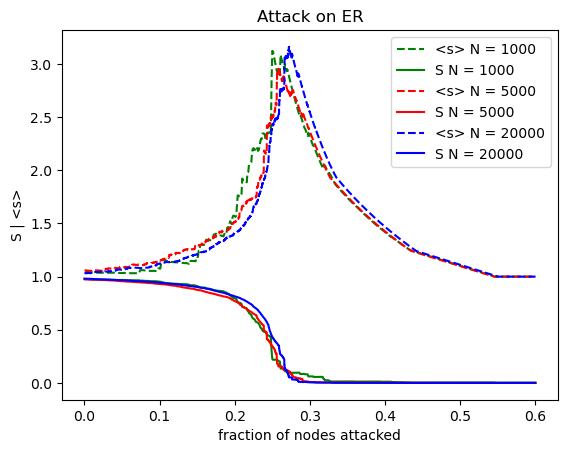

In [15]:
colors = ["green", "red" , "blue"]
for i,N in enumerate(Ns):
    data = attack_data_ER[i]
    all_S = []
    all_s = []
    fs = []
    for cell in data :
        fs.append(cell[0])
        all_S.append(cell[1])
        all_s.append(cell[2])
    plt.plot(fs,all_s,color = colors[i], linestyle = "dashed", label = "<s> N = " + str(N))
    plt.plot(fs,all_S,color = colors[i], label = "S N = " + str(N))
plt.title("Attack on ER")
plt.legend()
plt.xlabel("fraction of nodes attacked")
plt.ylabel("S | <s>")

## FAULT TOLERANCE OF SCALE FREE NETWORKS

In [24]:
Ns = [1000, 5000, 20000]
error_data_SF = []
for i,N in enumerate(Ns):
    data = generate_failure_data_for_scale_free(N, 2, 0.6)
    error_data_SF.append(data)

 N : 1000 and cur_f : 0.001 with max f : 0.6
 N : 1000 and cur_f : 0.002 with max f : 0.6
 N : 1000 and cur_f : 0.003 with max f : 0.6
 N : 1000 and cur_f : 0.004 with max f : 0.6
 N : 1000 and cur_f : 0.005 with max f : 0.6
 N : 1000 and cur_f : 0.006 with max f : 0.6
 N : 1000 and cur_f : 0.007 with max f : 0.6
 N : 1000 and cur_f : 0.008 with max f : 0.6
 N : 1000 and cur_f : 0.009 with max f : 0.6
 N : 1000 and cur_f : 0.01 with max f : 0.6
 N : 1000 and cur_f : 0.011 with max f : 0.6
 N : 1000 and cur_f : 0.012 with max f : 0.6
 N : 1000 and cur_f : 0.013 with max f : 0.6
 N : 1000 and cur_f : 0.014 with max f : 0.6
 N : 1000 and cur_f : 0.015 with max f : 0.6
 N : 1000 and cur_f : 0.016 with max f : 0.6
 N : 1000 and cur_f : 0.017 with max f : 0.6
 N : 1000 and cur_f : 0.018 with max f : 0.6
 N : 1000 and cur_f : 0.019 with max f : 0.6
 N : 1000 and cur_f : 0.02 with max f : 0.6
 N : 1000 and cur_f : 0.021 with max f : 0.6
 N : 1000 and cur_f : 0.022 with max f : 0.6
 N : 1000 an

Text(0, 0.5, 'S | <s>')

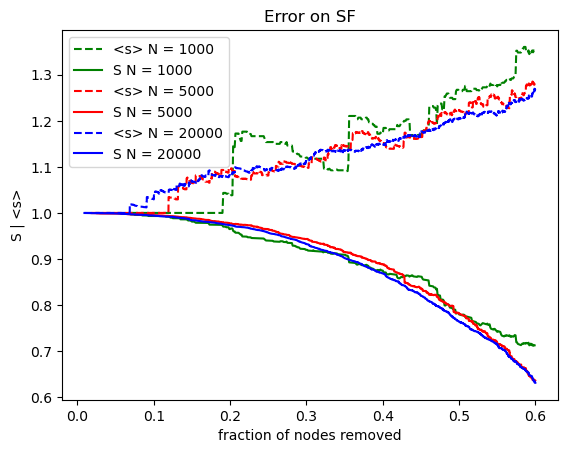

In [25]:
colors = ["green", "red" , "blue"]
for i,N in enumerate(Ns):
    data = error_data_SF[i]
    all_S = []
    all_s = []
    fs = []
    for cell in data :
        fs.append(cell[0])
        all_S.append(cell[1])
        all_s.append(cell[2])
    plt.plot(fs,all_s,color = colors[i], linestyle = "dashed", label = "<s> N = " + str(N))
    plt.plot(fs,all_S,color = colors[i], label = "S N = " + str(N))
plt.title("Error on SF")
plt.legend()
plt.xlabel("fraction of nodes removed")
plt.ylabel("S | <s>")

In [30]:
Ns = [1000, 5000, 20000]
attack_data_SF = []
for i,N in enumerate(Ns):
    data = generate_attack_data_scale_free(N, 2, 0.6)
    attack_data_SF.append(data)

 N : 1000 and cur_f : 0.001 with max f : 0.6
 N : 1000 and cur_f : 0.002 with max f : 0.6
 N : 1000 and cur_f : 0.003 with max f : 0.6
 N : 1000 and cur_f : 0.004 with max f : 0.6
 N : 1000 and cur_f : 0.005 with max f : 0.6
 N : 1000 and cur_f : 0.006 with max f : 0.6
 N : 1000 and cur_f : 0.007 with max f : 0.6
 N : 1000 and cur_f : 0.008 with max f : 0.6
 N : 1000 and cur_f : 0.009 with max f : 0.6
 N : 1000 and cur_f : 0.01 with max f : 0.6
 N : 1000 and cur_f : 0.011 with max f : 0.6
 N : 1000 and cur_f : 0.012 with max f : 0.6
 N : 1000 and cur_f : 0.013 with max f : 0.6
 N : 1000 and cur_f : 0.014 with max f : 0.6
 N : 1000 and cur_f : 0.015 with max f : 0.6
 N : 1000 and cur_f : 0.016 with max f : 0.6
 N : 1000 and cur_f : 0.017 with max f : 0.6
 N : 1000 and cur_f : 0.018 with max f : 0.6
 N : 1000 and cur_f : 0.019 with max f : 0.6
 N : 1000 and cur_f : 0.02 with max f : 0.6
 N : 1000 and cur_f : 0.021 with max f : 0.6
 N : 1000 and cur_f : 0.022 with max f : 0.6
 N : 1000 an

Text(0, 0.5, 'S | <s>')

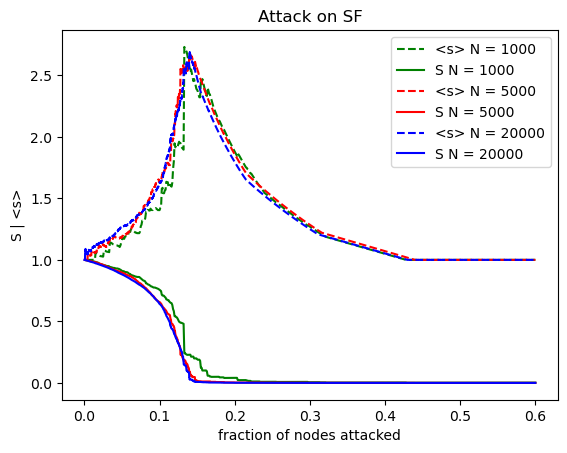

In [34]:
colors = ["green", "red" , "blue"]
for i,N in enumerate(Ns):
    data = attack_data_SF[i]
    all_S = []
    all_s = []
    fs = []
    for cell in data :
        fs.append(cell[0])
        all_S.append(cell[1])
        all_s.append(cell[2])
    plt.plot(fs,all_s,color = colors[i], linestyle = "dashed", label = "<s> N = " + str(N))
    plt.plot(fs,all_S,color = colors[i], label = "S N = " + str(N))
plt.title("Attack on SF")
plt.legend()
plt.xlabel("fraction of nodes attacked")
plt.ylabel("S | <s>")